# Analysis of real world rural street networks

In [ ]:
#Load libraries

import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv
import collections
from scipy.spatial import Delaunay

In [2]:
# Load copies of network 
G = pkl.load(open("StreetNetworkData/bawue_ruralgraph_drivenet.pkl", "rb"))
GBawue=pkl.load(open("StreetNetworkData/bawue_ruralgraph_drivenet.pkl", "rb"))
GBawue2=pkl.load(open("StreetNetworkData/bawue_ruralgraph_drivenet.pkl", "rb"))

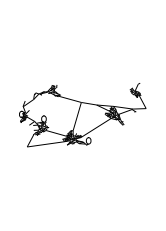

In [3]:
plt.subplot(121)
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=False, node_size=0)
plt.axis('equal')
plt.show()

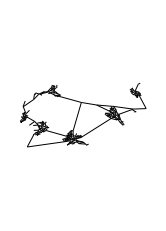

In [5]:
#Delete Selfloops

for u,v in G.edges:
    if u==v:
        G.remove_edge(u, v)
        GBawue.remove_edge(u, v)
        GBawue2.remove_edge(u, v)

#Plot for Checking
plt.subplot(121)
nx.draw(GBawue2, nx.get_node_attributes(GBawue2, 'pos'), with_labels=False, node_size=0)
plt.axis('equal')
plt.show()

[650.4372070684761, 642.9492954523464]
[5590.19112216, 5584.26264572]


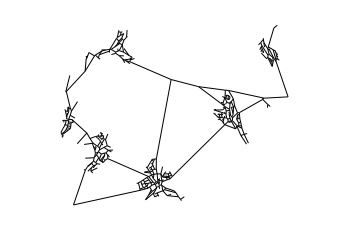

In [6]:
#correct positions

#get mean lattitude
newpos=[]
collectlat=[]
for e in G.nodes:
    
    poss=G.nodes[e]['pos']
    #print(poss)
    collectlat.append(poss[1])
    
meanlat=(max(collectlat)+min(collectlat))/2
for e in G.nodes:
    
    poss=G.nodes[e]['pos']
    #print(poss)
    long=poss[0]
    latt=poss[1]
    ycoord=113.2*latt
    xcoord= 40075 * np.cos( meanlat*np.pi/180 ) / 360*long
    newpos.append([xcoord,ycoord])
    GBawue.nodes[e]['pos']=[xcoord,ycoord]
    GBawue2.nodes[e]['pos']=[xcoord,ycoord]

newposa=np.asarray(newpos)

#Plot for checking plausibility
print([max(newposa[:,0]),min(newposa[:,0])])
print([max(newposa[:,1]),min(newposa[:,1])])
plt.xlim([min(newposa[:,0]),max(newposa[:,0])])
plt.ylim([min(newposa[:,1]),max(newposa[:,1])])
nx.draw(GBawue, nx.get_node_attributes(GBawue, 'pos'), with_labels=False, node_size=0)
plt.axis('equal')
plt.show()

#Generate weigthed edge distance between junctions
collectalllengths=[]
for u,v in GBawue2.edges(data=False):
    newposa1=GBawue.nodes[u]['pos']
    newposa2=GBawue.nodes[v]['pos']
    GBawue2.edges[u,v]['length'] = np.sqrt((newposa1[0]-newposa2[0])**2+(newposa1[1]-newposa2[1])**2)
    collectalllengths.append(np.sqrt((newposa1[0]-newposa2[0])**2+(newposa1[1]-newposa2[1])**2))
    


0.028133733059979255
0.03164682511361092


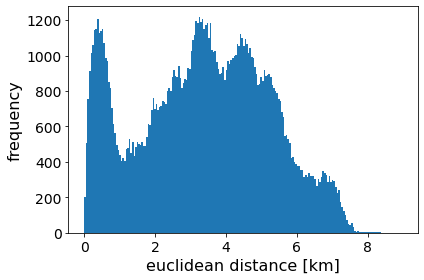

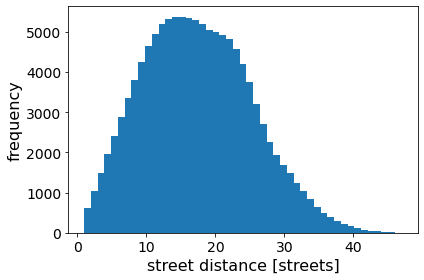

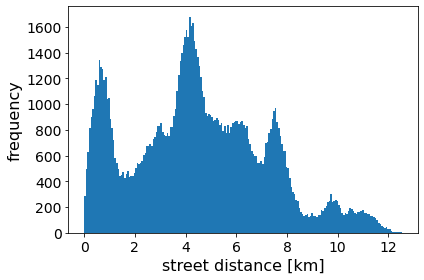

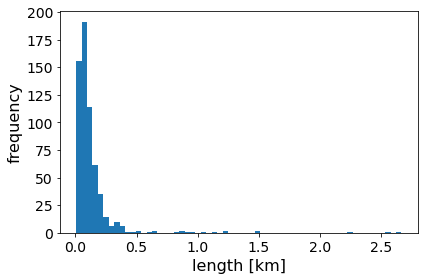

In [7]:

#get betweeness
edges3=nx.edge_betweenness_centrality(GBawue2,normalized=True)
nodes3=nx.betweenness_centrality(GBawue2,normalized=True)
edges4=nx.edge_betweenness_centrality(GBawue2,weight='length',normalized=True)
nodes4=nx.betweenness_centrality(GBawue2,weight='length',normalized=True)

#set betweeness
nx.set_edge_attributes(GBawue2, edges4, "betweenness2")
nx.set_node_attributes(GBawue2, nodes4, "betweenness2")
    
nx.set_edge_attributes(GBawue2, edges3, "betweenness")
nx.set_node_attributes(GBawue2, nodes3, "betweenness")

#get average betweeness
averageBetweeness=[]
for u,v in GBawue2.edges(data=False):
    averageBetweeness.append(GBawue2.edges[u,v]['betweenness'])
meanaverage=np.mean(averageBetweeness)
print(meanaverage)

averageBetweeness2=[]
for u,v in GBawue2.edges(data=False):
    averageBetweeness2.append(GBawue2.edges[u,v]['betweenness2'])
meanaverage2=np.mean(averageBetweeness2)
print(meanaverage2)



#Generate euclidean distance between junctions
totaldistanceED=[]
for u in range(len(newposa)):
    for v in range(len(newposa)):
        if u<v:
            newdistance=np.sqrt((newposa[u,0]-newposa[v,0])**2+(newposa[u,1]-newposa[v,1])**2)
            totaldistanceED.append(newdistance)
            
#plot histogram            
plt.hist(totaldistanceED,200)
plt.ylabel('frequency',fontsize=16)
plt.xlabel('euclidean distance [km]',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0,5.2)
filename='Figures2/BaWue_DistanceEuc.pdf'
plt.tight_layout()
plt.savefig(filename)
plt.show()

#Generate edge distance between junctions
totaldistanceEDD=[]
lendistance=dict(nx.all_pairs_shortest_path_length(GBawue2))
#print(lendistance[0])
for u in GBawue2.nodes:
    for v in GBawue2.nodes:
        if u<v:
            newdistance=lendistance[u][v]
            totaldistanceEDD.append(newdistance)
            
#plot histogram            
plt.hist(totaldistanceEDD,np.max(totaldistanceEDD))
plt.ylabel('frequency',fontsize=16)
plt.xlabel('street distance [streets]',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0,50)
filename='Figures2/BaWue_DistanceStreets.pdf'
plt.tight_layout()
plt.savefig(filename)
plt.show()

    
#Generate edge distance between junctions (weighted)  
totaldistanceWED=[]
lendistance=dict(nx.all_pairs_dijkstra_path_length(GBawue2, cutoff=None, weight='length'))
for u in GBawue2.nodes:
    for v in GBawue2.nodes:
        if u<v:
            newdistance=lendistance[u][v]
            totaldistanceWED.append(newdistance)
            

#plot histogram
plt.hist(totaldistanceWED,200)
plt.ylabel('frequency',fontsize=16)
plt.xlabel('street distance [km]',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0,6.7)
filename='Figures2/Bawue_DistanceStreetsWeight.pdf'
plt.tight_layout()
plt.savefig(filename)
plt.show()

plt.hist(collectalllengths,60)
plt.ylabel('frequency',fontsize=16)
plt.xlabel('length [km]',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlim(0,3)
filename='Figures2/BaWue_LengthStreets.pdf'
plt.tight_layout()
plt.savefig(filename)
plt.show()


In [8]:
#compute impact

#create copy of graph
GBawueDel=pkl.load(open("StreetNetworkData/bawue_ruralgraph_drivenet.pkl", "rb"))

for x,y in GBawueDel.edges(data=False):
    if x==y:
        GBawueDel.remove_edge(x, y)
    else:
        newposa1=GBawue.nodes[x]['pos']
        newposa2=GBawue.nodes[y]['pos']
        GBawueDel.edges[x,y]['length'] = np.sqrt((newposa1[0]-newposa2[0])**2+(newposa1[1]-newposa2[1])**2)

counter=0

#compute new average impact after having deleted edges
for u,v in GBawue2.edges(data=False):
    newposa1=GBawue.nodes[u]['pos']
    newposa2=GBawue.nodes[v]['pos']

    GBawueDel.remove_edge(u, v)
    edgesDel=nx.edge_betweenness_centrality(GBawueDel,normalized=True)
    nx.set_edge_attributes(GBawueDel, edgesDel, "betweenness")
    averageBetweenessDel=[]
    for x,y in GBawueDel.edges(data=False):
        averageBetweenessDel.append(GBawueDel.edges[x,y]['betweenness'])

    meanaverageDel=np.mean(averageBetweenessDel)
    #print([u,v,(meanaverageDel-meanaverage)/meanaverage])
    GBawue2.edges[u,v]['del'] = ((meanaverageDel-meanaverage)/meanaverage)
    GBawueDel.add_edge(u, v, length=np.sqrt((newposa1[0]-newposa2[0])**2+(newposa1[1]-newposa2[1])**2))
    counter=counter+1
    #print(counter/len(averageBetweeness2))
    
print('done1')


done1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


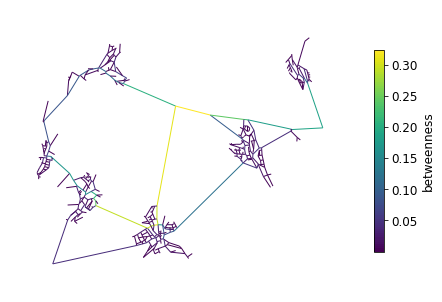

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


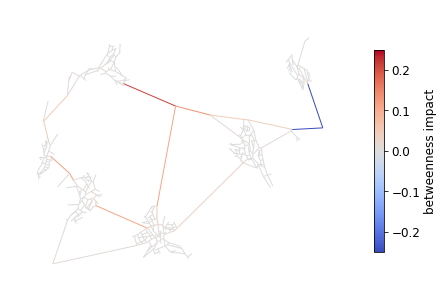

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


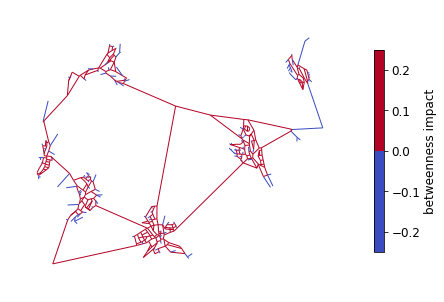

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


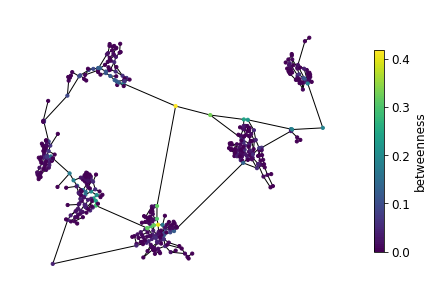

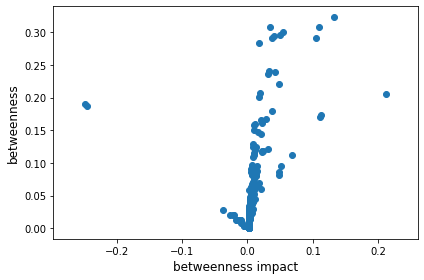

In [9]:
#Plot results

nodes3=nx.closeness_centrality(GBawue)

#print(edges3)


nx.set_node_attributes(GBawue2, nodes3, "closeness")

seismic = plt.cm.get_cmap('coolwarm', 100)
viridis = plt.cm.get_cmap('viridis', 100)

#create and plot graph with edge color

edges,weights = zip(*nx.get_edge_attributes(GBawue2,'betweenness').items())

vmin = min(weights)
vmax = max(weights)

nx.draw(GBawue2, nx.get_node_attributes(GBawue2, 'pos'), with_labels=False, node_size=0,edgelist=edges, edge_color=weights,edge_vmin=vmin, edge_vmax=vmax,edge_cmap=viridis)

sm = plt.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar=plt.colorbar(sm,shrink=0.7)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.set_ylabel('betweenness',fontsize=12)

plt.tight_layout()
plt.axis('equal')

filename='Figures2/BaWue_Betweenness.pdf'
plt.savefig(filename)

plt.show()

###########

#create and plot graph with edge color

edges,weights = zip(*nx.get_edge_attributes(GBawue2,'del').items())

#delprop=[]
#for u,v in GBawue2.edges(data=False):
#    delprop.append(GBawue2.edges[u,v]['del'])

vmin = min(weights)
vmax = -min(weights)

#nx.draw(GBawue2, nx.get_node_attributes(GBawue2, 'pos'), with_labels=False, node_size=0,edgelist=edges, edge_color=weights,edge_cmap=seismic,edge_vmin=min(delprop),edge_vmax=-min(delprop))
nx.draw(GBawue2, nx.get_node_attributes(GBawue2, 'pos'), with_labels=False, node_size=0,edgelist=edges, edge_color=weights,edge_vmin=vmin, edge_vmax=vmax,edge_cmap=seismic)

sm = plt.cm.ScalarMappable(cmap=seismic, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar=plt.colorbar(sm,shrink=0.7)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.set_ylabel('betweenness impact',fontsize=12)

plt.tight_layout()
plt.axis('equal')

filename='Figures2/BaWue_BetweennessImpact.pdf'
plt.savefig(filename)

plt.show()

###########




for u,v in GBawue2.edges(data=False):
    if GBawue2.edges[u,v]['del']<0:
        GBawue2.edges[u,v]['del2'] = min(weights)
    elif GBawue2.edges[u,v]['del']>0:
        GBawue2.edges[u,v]['del2'] = -min(weights)
    else:
        GBawue2.edges[u,v]['del2'] = 0
        

#create and plot graph with edge color

edges,weights = zip(*nx.get_edge_attributes(GBawue2,'del2').items())
seismic2 = plt.cm.get_cmap('coolwarm', 2)

#delprop=[]
#for u,v in GBawue2.edges(data=False):
#    delprop.append(GBawue2.edges[u,v]['del'])

vmin = min(weights)
vmax = -min(weights)

#nx.draw(GBawue2, nx.get_node_attributes(GBawue2, 'pos'), with_labels=False, node_size=0,edgelist=edges, edge_color=weights,edge_cmap=seismic,edge_vmin=min(delprop),edge_vmax=-min(delprop))
nx.draw(GBawue2, nx.get_node_attributes(GBawue2, 'pos'), with_labels=False, node_size=0,edgelist=edges, edge_color=weights,edge_vmin=vmin, edge_vmax=vmax,edge_cmap=seismic2)

sm = plt.cm.ScalarMappable(cmap=seismic2, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar=plt.colorbar(sm,shrink=0.7)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.set_ylabel('betweenness impact',fontsize=12)

plt.tight_layout()
plt.axis('equal')

filename='Figures2/BaWue_BetweennessImpact2.pdf'
plt.savefig(filename)

plt.show()

###########


#create and plot graph with edge color

nodes,weights = zip(*nx.get_node_attributes(GBawue2,'betweenness').items())

vmin = min(weights)
vmax = max(weights)

nx.draw(GBawue2, nx.get_node_attributes(GBawue2, 'pos'), with_labels=False, node_size=10,nodelist=nodes, node_color=weights,vmin=vmin, vmax=vmax,cmap=viridis)

sm = plt.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar=plt.colorbar(sm,shrink=0.7)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.set_ylabel('betweenness',fontsize=12)

plt.tight_layout()
plt.axis('equal')

filename='Figures2/BaWue_BetweennessNode.pdf'
plt.savefig(filename)

plt.show()

###########


#scatter plot

delprop2=[]
for u,v in GBawue2.edges(data=False):
    delprop2.append([GBawue2.edges[u,v]['del'],GBawue2.edges[u,v]['betweenness']])
delprop2a=np.asarray(delprop2)

plt.scatter(delprop2a[:,0],delprop2a[:,1])
plt.xlabel('betweenness impact',fontsize=12)
plt.ylabel('betweenness',fontsize=12)

plt.tight_layout()
plt.axis('equal')

filename='Figures2/BaWue_ScatterBetween.pdf'
plt.savefig(filename)
plt.show()
